In [2]:
import random
import timeit
import math

In [3]:
def rand_tuple_gen(x, tuples = []):
    random.seed(42)
    
    for i in range(x*10):
        rnd = random.randint(1, x)
        i = 0
        while i < len(tuples) and rnd != tuples[i][0]:
            i += 1

        if i == len(tuples): # add new tuple
            tuples.append((rnd, 1))
        else:
            tuples[i] = (rnd, tuples[i][1] + 1)

    return tuples

In [38]:
rand_tuple_gen(100)

[(2, 259),
 (1, 301),
 (5, 309),
 (4, 301),
 (3, 291),
 (9, 335),
 (10, 262),
 (7, 296),
 (8, 277),
 (6, 289),
 (18, 287),
 (19, 229),
 (14, 307),
 (17, 292),
 (20, 296),
 (15, 251),
 (11, 272),
 (13, 272),
 (12, 240),
 (16, 245),
 (35, 254),
 (38, 232),
 (28, 270),
 (33, 252),
 (39, 285),
 (36, 289),
 (27, 268),
 (29, 224),
 (22, 235),
 (25, 214),
 (23, 220),
 (30, 286),
 (40, 268),
 (24, 248),
 (37, 202),
 (21, 259),
 (26, 260),
 (32, 266),
 (34, 269),
 (31, 232),
 (70, 256),
 (76, 221),
 (55, 246),
 (65, 244),
 (78, 218),
 (72, 220),
 (54, 217),
 (58, 226),
 (44, 236),
 (49, 214),
 (46, 167),
 (45, 197),
 (59, 256),
 (69, 239),
 (71, 257),
 (80, 221),
 (47, 215),
 (74, 202),
 (48, 218),
 (60, 244),
 (42, 194),
 (41, 287),
 (52, 214),
 (73, 193),
 (64, 208),
 (51, 208),
 (75, 207),
 (66, 202),
 (77, 226),
 (50, 182),
 (68, 221),
 (56, 243),
 (63, 202),
 (61, 245),
 (57, 203),
 (67, 211),
 (43, 199),
 (53, 213),
 (62, 173),
 (79, 198),
 (140, 174),
 (152, 201),
 (109, 207),
 (130, 198

In [59]:
%timeit rand_tuple_gen(100)
a = rand_tuple_gen(100)

8.12 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit rand_tuple_gen(100, a)


In [31]:
%timeit rand_tuple_gen(20)

433 µs ± 6.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%timeit rand_tuple_gen(40)

1.32 ms ± 8.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%timeit rand_tuple_gen(80)

4.44 ms ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
def rand_bin_tuple_gen(x):
    random.seed(42)
    tuples = []

    def bin_insert(rnd, start, end):
        if end < start: # element not found
            tuples.insert(start, (rnd, 1))
            return
        
        split = (start + end) // 2
        if tuples[split][0] == rnd: # already exists
            tuples[split] = (rnd, tuples[split][1] + 1)
            return
        elif tuples[split][0] < rnd:
            return bin_insert(rnd, split + 1, end)
        else:
            return bin_insert(rnd, start, split - 1)
    
            

    for i in range(x*10):
        rnd = random.randint(1, x)
        bin_insert(rnd, 0, len(tuples)-1)

    return tuples

In [7]:
rand_bin_tuple_gen(10)

[(1, 9),
 (2, 14),
 (3, 8),
 (4, 16),
 (5, 11),
 (6, 11),
 (7, 9),
 (8, 6),
 (9, 8),
 (10, 8)]

In [34]:
%timeit rand_bin_tuple_gen(10000)

548 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit rand_bin_tuple_gen(200)

5.86 ms ± 46.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
def rand_int_index_solution(x):
    random.seed(42)
    lst = [0] * x

    for i in range(x*10):
        rnd = random.randint(1, x)
        lst[rnd-1] += 1

    return lst

In [13]:
rand_int_index_solution(10)


[9, 14, 8, 16, 11, 11, 9, 6, 8, 8]

In [30]:
%timeit rand_int_index_solution(10000)

99.5 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit rand_int_index_solution(20000)

201 ms ± 6.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
def rand_int_dict(x):
    random.seed(42)
    d = {}

    for i in range(x*10):
        rnd = random.randint(1, x)

        if rnd not in d:
            d[rnd] = 0
        d[rnd] += 1

    return d

In [8]:
a = %timeit rand_int_dict(10)
a

100 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
%timeit rand_int_dict(10000)

105 ms ± 2.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
a = %timeit rand_int_dict(20000)

208 ms ± 5.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:


def measure_times(func, last_result_only=False, number=1):
    """
    Runs func on successively growing data (amount doubled for each run) and measures time for comparison
    :param func: function to measure times for
    :param number: number of runs per measurement (default: 1 because of long duration with large data already)
    :return: None
    """
    n = 10
    times = []
    t1 = timeit.timeit(lambda: func(n), number=number)
    times.append((n, t1))
    if not last_result_only:
        print(n, ' values: ', t1, 'sec')
    while t1 < 10 and n < 1000000:
        n *= 2
        t0 = t1
        t1 = timeit.timeit(lambda: func(n), number=number)
        times.append((n, t1))
        if not last_result_only:
            print(n, ' values: ', t1, 'sec, ratio: ', t1 / t0)
    if last_result_only:
        print(n, ' values: ', t1, 'sec, ratio: ', t1 / t0)

    return times


In [27]:
simple_list_times = measure_times(rand_int_index_solution)
dict_times = measure_times(rand_int_dict)
bin_search_times = measure_times(rand_bin_tuple_gen)
seq_search_times = measure_times(rand_tuple_gen)

10  values:  0.00013269300006868434 sec
20  values:  0.00020554599996103207 sec, ratio:  1.5490342358273435
40  values:  0.0003956700002163416 sec, ratio:  1.924970567616756
80  values:  0.0007809959997757687 sec, ratio:  1.9738570004011964
160  values:  0.001561221999963891 sec, ratio:  1.9990140799852143
320  values:  0.003240589999677468 sec, ratio:  2.0756753362125426
640  values:  0.00667683500023486 sec, ratio:  2.0603763514975353
1280  values:  0.013529254000332003 sec, ratio:  2.026297489732202
2560  values:  0.02658307000001514 sec, ratio:  1.9648585206074778
5120  values:  0.05495055599976695 sec, ratio:  2.0671260317087397
10240  values:  0.10953639499985002 sec, ratio:  1.9933628151153662
20480  values:  0.22355036699991615 sec, ratio:  2.040877527512406
40960  values:  0.4405795200000284 sec, ratio:  1.9708288826034166
81920  values:  0.8382595070002026 sec, ratio:  1.9026293074179854
163840  values:  1.7479037339999195 sec, ratio:  2.085158258753273
327680  values:  3.575

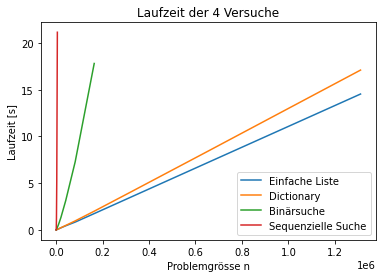

In [37]:
import matplotlib.pyplot as plt
import numpy as np


lsts = [("Einfache Liste", simple_list_times), ("Dictionary", dict_times), ("Binärsuche", bin_search_times), ("Sequenzielle Suche", seq_search_times)]

for lst in lsts:
    x, y = np.array(lst[1]).T
    plt.plot(x, y, label=lst[0])



plt.title('Laufzeit der 4 Versuche')
plt.xlabel('Problemgrösse n')
plt.ylabel('Laufzeit [s]')
plt.legend()
plt.yscale("linear")
plt.show()